In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# **First Fit the Model on Train Dataset**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya Dataset/Black_Friday/train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# **Response Variable Purchase**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


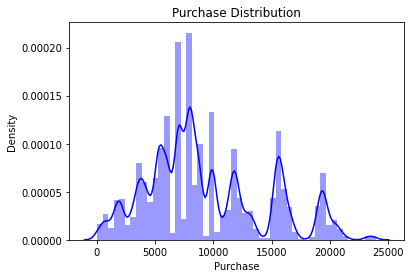

In [ ]:
sns.distplot(train["Purchase"], color = 'b')
plt.title("Purchase Distribution")
plt.show()

In [ ]:
train["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

# **Gender Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


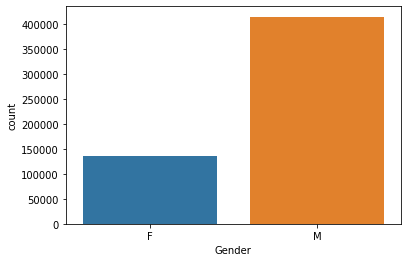

In [ ]:
sns.countplot(train['Gender'])
plt.show()

In [ ]:
train['Gender'].value_counts(normalize = True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
train.groupby("Gender").median()["Purchase"]

Gender
F    7914.0
M    8098.0
Name: Purchase, dtype: float64

# **Marital Status**

In [ ]:
train.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

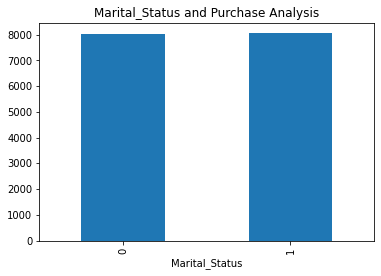

In [ ]:
train.groupby("Marital_Status").median()["Purchase"].plot(kind = 'bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

# **Age Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


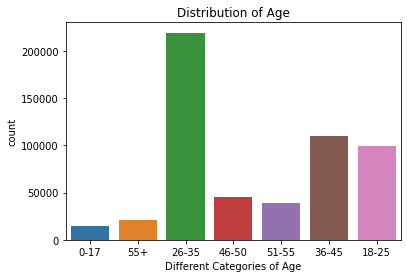

In [ ]:
sns.countplot(train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

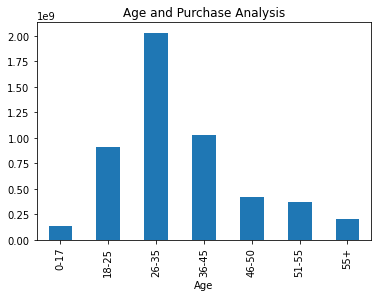

In [ ]:
train.groupby("Age").sum()['Purchase'].plot(kind = "bar")
plt.title("Age and Purchase Analysis")
plt.show()

In [ ]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# **HeatMap**

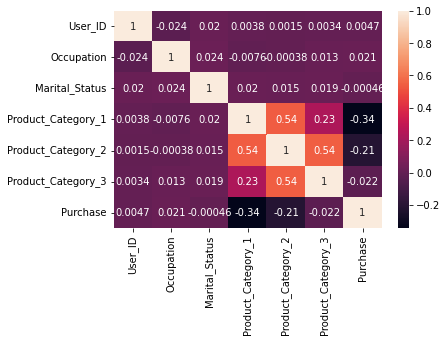

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(), inplace = True)
train['Product_Category_3'].fillna(train['Product_Category_3'].median(), inplace = True)

# **Splitting data into independent and dependent variables.**

In [ ]:
X = train.drop(['User_ID', 'Product_ID', 'Purchase'], axis = 1)
y = train['Purchase']

In [ ]:
train_X = pd.get_dummies(X, drop_first = True)

### **Clustering for better result.**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters = 5, random_state = 2021)
model.fit(train_X)

KMeans(n_clusters=5, random_state=2021)

In [ ]:
clustNos = [2,3,4,5,6,7,8]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters = i, random_state = 2021)
    model.fit(train_X)
    Inertia.append(model.inertia_)

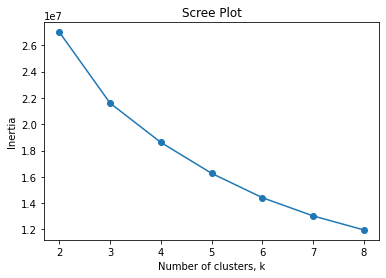

In [ ]:
plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [ ]:
labels = model.predict(train_X)

In [ ]:
print(labels)

[3 6 4 ... 3 4 4]


In [ ]:
clusterID = pd.DataFrame({'ClustID':labels})
clustered_train = pd.concat([train_X.reset_index(), clusterID], axis = 1)

In [ ]:
clustered_train['ClustID'].astype("object")

0         3
1         6
2         4
3         4
4         3
         ..
550063    4
550064    4
550065    3
550066    4
550067    4
Name: ClustID, Length: 550068, dtype: object

In [ ]:
clust_train_X = pd.get_dummies(clustered_train, drop_first = True)
clust_train_X.head()

,index,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,ClustID
0,0,10,0,3,9.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
1,1,10,0,1,6.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,6
2,2,10,0,12,9.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
3,3,10,0,12,14.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,4,16,0,8,9.0,14.0,1,0,0,0,0,0,1,0,1,0,0,0,1,3


# **Modeling**

**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
lr_range = [0.25]
n_est_range = [150]
depth_range = [8]


parameters = dict(learning_rate = lr_range, n_estimators = n_est_range, max_depth = depth_range)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = XGBRegressor(random_state = 2020)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, random_state = 2020, shuffle = True)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
clf = XGBRegressor(random_state = 2021, use_label_encoder = False)
cv = GridSearchCV(clf, param_grid = parameters, cv = kfold, scoring = 'r2')

In [ ]:
A = clust_train_X.drop(['index'], axis = 1)

In [ ]:
cv.fit(A, y)

[11:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:15:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=XGBRegressor(random_state=2021, use_label_encoder=False),
             param_grid={'learning_rate': [0.25], 'max_depth': [8],
                         'n_estimators': [150]},
             scoring='r2')

# **H2O AutoML for Improving Result**

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=bc17a82d76789e1e504775bdadfd73f33fca9a13140cb33581170d8b212e917b
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnli9i6x4
  JVM stdout: /tmp/tmpnli9i6x4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnli9i6x4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_1rzmtp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
A_t = pd.concat([A, y], axis = 1)

In [ ]:
df_hf = h2o.H2OFrame(A_t)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
X = df_hf.col_names[1:]
y = 'Purchase'

In [ ]:
print("Pridictors = " + str(X))
print("Response = " + y)

Pridictors = ['Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+', 'ClustID', 'Purchase']
Response = Purchase


In [ ]:
X.remove(y)

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs = 30)

In [ ]:
aml.train(x = X, y = y, training_frame = df_hf)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220623_112917

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 15411627.419533892
RMSE: 3925.76456496488
MAE: 3102.297638200776
RMSLE: 0.6555319085980303
R^2: 0.3843884669331974
Mean Residual Deviance: 15411627.419533892
Null degrees of freedom: 9914
Residual degrees of freedom: 9913
Null deviance: 248331061417.08365
Residual deviance: 152806285864.67853
AIC: 192243.07542198745

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 15599572.864807224
RMSE: 3949.629459178066
MAE: 3115.7246717390867
RMSLE: 0.6517578938229175
R^2: 0.3833823594237932
Mean Residual Deviance: 15599572.864807224
Null degrees of freedom: 55129
Residual degrees of freedom: 55128
Null deviance: 1394716564826.0999

In [ ]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20220623_112917,3949.63,1.55996e+07,3115.72,0.651758,1.55996e+07
GBM_1_AutoML_1_20220623_112917,4631.11,2.14472e+07,3705.37,0.723014,2.14472e+07
XGBoost_1_AutoML_1_20220623_112917,4680.77,2.19096e+07,3712.34,0.560154,2.19096e+07
GLM_1_AutoML_1_20220623_112917,5029.75,2.52984e+07,4076.85,0.760753,2.52984e+07


In [ ]:
print(cv.best_score_)

0.6776085996838871


# **Prediction on Test Dataset**



In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya Dataset/Black_Friday/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
test.isnull().sum()

In [ ]:
test.nunique()

In [ ]:
test['Product_Category_2'].fillna(test['Product_Category_2'].median(), inplace = True)
test['Product_Category_3'].fillna(test['Product_Category_3'].median(), inplace = True)

In [ ]:
test_X = test.drop(['User_ID', 'Product_ID'], axis = 1)

In [ ]:
test_F = pd.get_dummies(test_X, drop_first = True)

In [ ]:
model = KMeans(n_clusters = 5, random_state = 2021)
model.fit(test_F)

KMeans(n_clusters=5, random_state=2021)

In [ ]:
clustNos = [2,3,4,5,6,7,8]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters = i, random_state = 2021)
    model.fit(train_X)
    Inertia.append(model.inertia_)

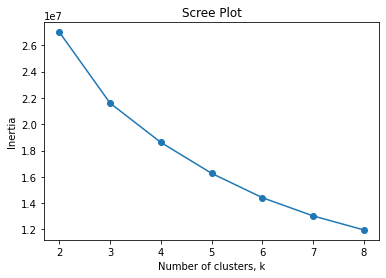

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [ ]:
labels = model.predict(test_F)

In [ ]:
print(labels)

[2 6 2 ... 6 2 0]


In [ ]:
clusterID = pd.DataFrame({'ClustID':labels})
clustered_test = pd.concat([test_F.reset_index(), clusterID], axis = 1)

In [ ]:
clust_test_X = pd.get_dummies(clustered_test, drop_first = True)
clust_test_X.head()

,index,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,ClustID
0,0,7,1,1,11.0,14.0,1,0,0,0,1,0,0,1,0,0,1,0,0,2
1,1,17,0,3,5.0,14.0,1,0,1,0,0,0,0,0,1,0,0,0,0,6
2,2,1,1,5,14.0,14.0,0,0,0,1,0,0,0,1,0,0,0,0,1,2
3,3,1,1,4,9.0,14.0,0,0,0,1,0,0,0,1,0,0,0,0,1,7
4,4,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
clust_test_X_A = clust_test_X.drop(['index'], axis = 1)

In [ ]:
Final = cv.predict(clust_test_X_A)

In [ ]:
df_t_hf = h2o.H2OFrame(clust_test_X_A)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
prediction = aml.predict(df_t_hf)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
pred_df = prediction.as_data_frame()

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya Dataset/Black_Friday/sample_submission_V9Inaty.csv')
sample.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [ ]:
sample["Purchase"] = Final

In [ ]:
sample.to_csv("/content/drive/MyDrive/My Submission/Black_Friday_Clustered_XGB_GS_H2O.csv", index = False)